In [1]:
import numpy as np
import matplotlib.pyplot as plt
import uproot
from scipy.optimize import curve_fit
from matplotlib.gridspec import GridSpec

In [19]:
with open('Light_count_SiPM_PDE_Hammamatsu_450nm.txt', 'r') as file:
    # Lee todas las líneas del archivo
    lines = file.readlines()

    # Itera sobre cada línea y convierte el contenido a números
    ChargeHam = [float(line.strip()) for line in lines]

    
with open('Light_count_SiPM_PDE_CAEN_450nm.txt', 'r') as file:
    # Lee todas las líneas del archivo
    lines = file.readlines()

    # Itera sobre cada línea y convierte el contenido a números
    ChargeCaen = [float(line.strip()) for line in lines]


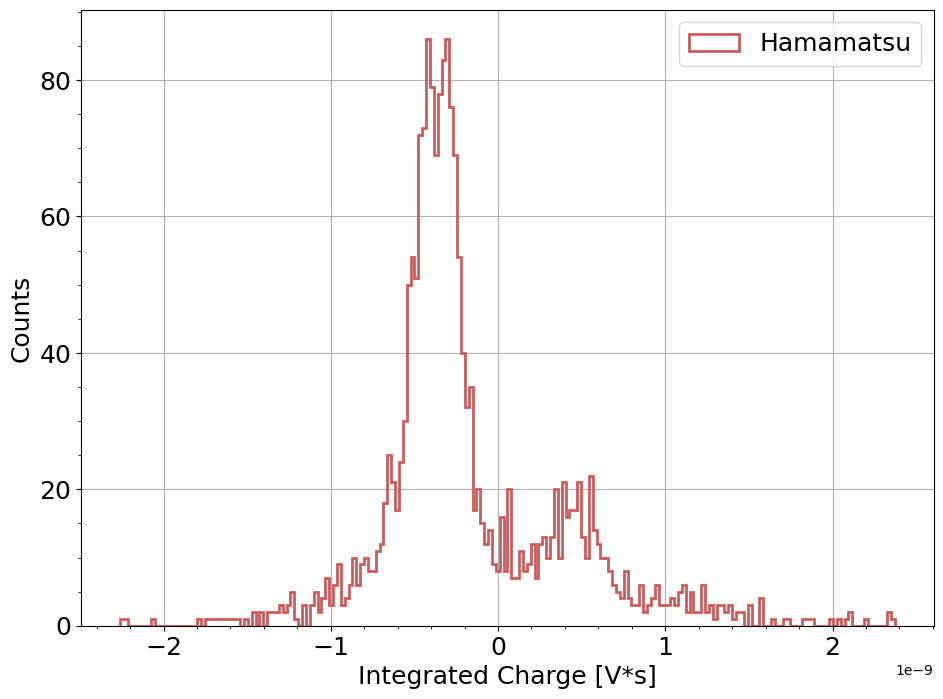

In [53]:
fig, ax =plt.subplots(1, figsize=(11,8))

hham=ax.hist(ChargeHam, histtype='step', bins=200, lw=2, color='indianred', label='Hamamatsu')

ax.grid()
ax.minorticks_on()
ax.tick_params(axis='both', which='major', labelsize=18)
ax.set_ylabel('Counts', fontsize=18)
ax.set_xlabel('Integrated Charge [V*s]', fontsize=18)
ax.legend(fontsize=18)


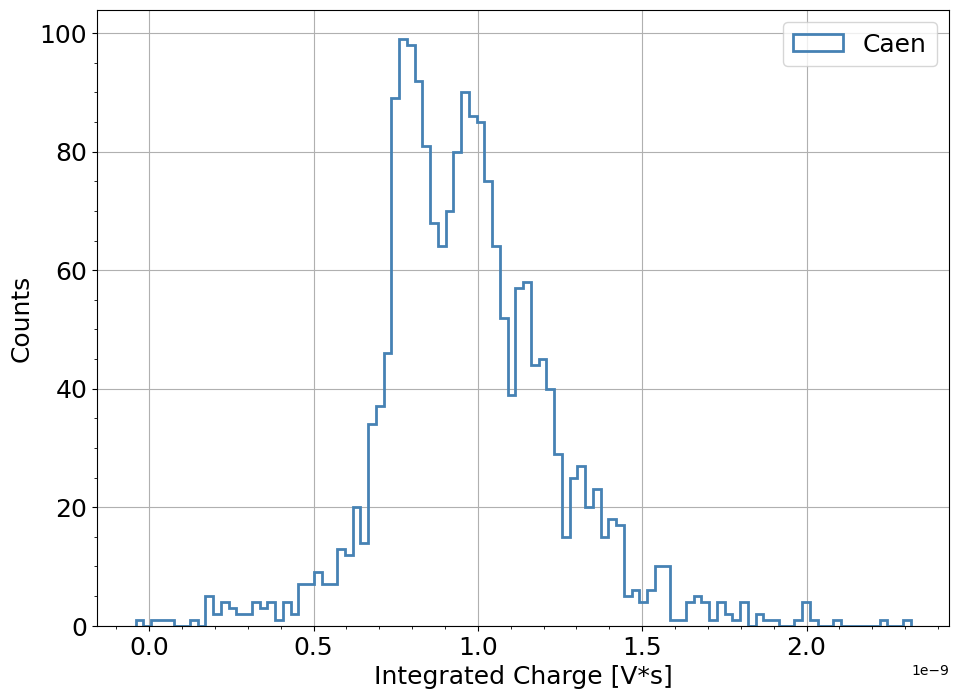

In [31]:

fig, ax =plt.subplots(1, figsize=(11,8))

hcaen=ax.hist(ChargeCaen, histtype='step', bins=100, lw=2, color='steelblue', label='Caen')
ax.grid()
ax.minorticks_on()
ax.tick_params(axis='both', which='major', labelsize=18)
ax.set_ylabel('Counts', fontsize=18)
ax.set_xlabel('Integrated Charge [V*s]', fontsize=18)
ax.legend(fontsize=18)

In [47]:
minima=[6.897489999999999e-10, 8.783809999999999e-10,1.0905919999999999e-09,1.255645e-09]




In [48]:
print(minima[3]-minima[2])
print(minima[2]-minima[1])
print(minima[1]-minima[0])

1.650530000000001e-10
2.1221099999999994e-10
1.8863200000000002e-10


In [49]:
minima[3]

1.255645e-09

In [189]:
Wf=[]
for num in range(2000):
    with open('2000/20001_' +str(num)+'.txt', 'r') as file:
        # Lee todas las líneas del archivo
        lines = file.readlines()
        # Itera sobre cada línea y convierte el contenido a números
        Wf.append([float(line.strip()) for line in lines[450:700]])



0 Baseline is  0.0015577999999999998  Integral is  0.38945000000000024  With a max of  0.00181
1 Baseline is  0.0014345599999999999  Integral is  0.3586400000000003  With a max of  0.00181
2 Baseline is  0.00366924  Integral is  0.9173099999999976  With a max of  0.00508
3 Baseline is  0.00256816  Integral is  0.6420399999999985  With a max of  0.00337
4 Baseline is  0.00186788  Integral is  0.46696999999999983  With a max of  0.00225
5 Baseline is  0.0017982  Integral is  0.4495500000000002  With a max of  0.00206
6 Baseline is  0.00436  Integral is  1.089999999999999  With a max of  0.00625
7 Baseline is  0.0036959199999999997  Integral is  0.9239799999999969  With a max of  0.00474
8 Baseline is  0.0014747200000000001  Integral is  0.36868000000000006  With a max of  0.00181
9 Baseline is  0.0037814800000000007  Integral is  0.9453699999999974  With a max of  0.00562


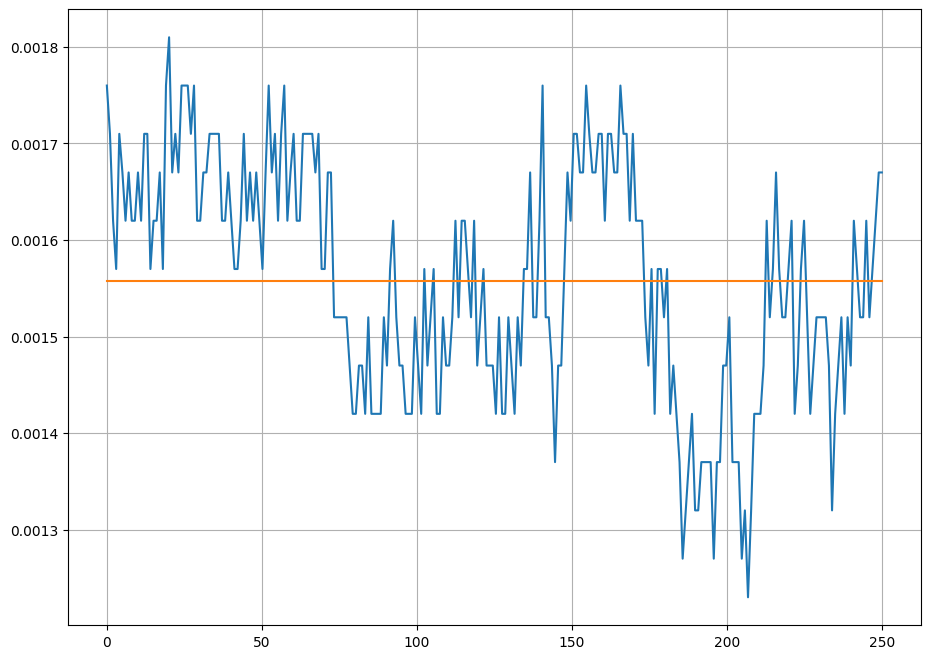

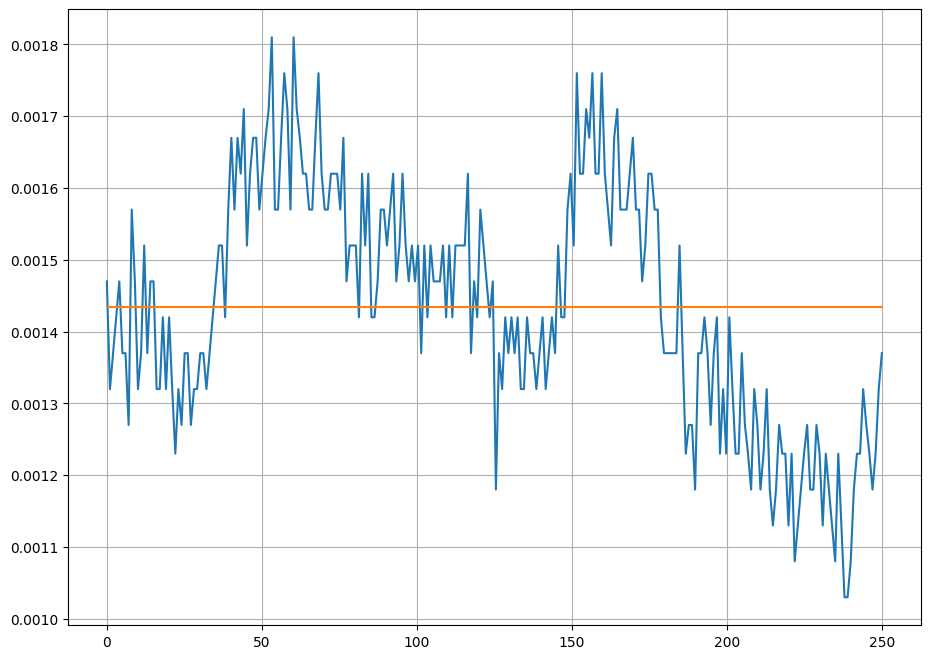

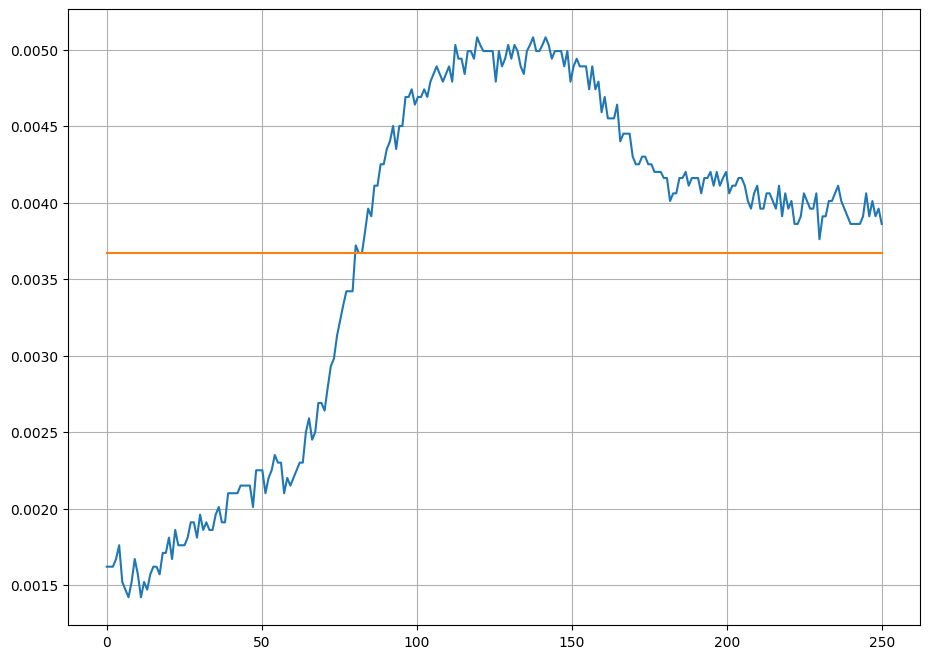

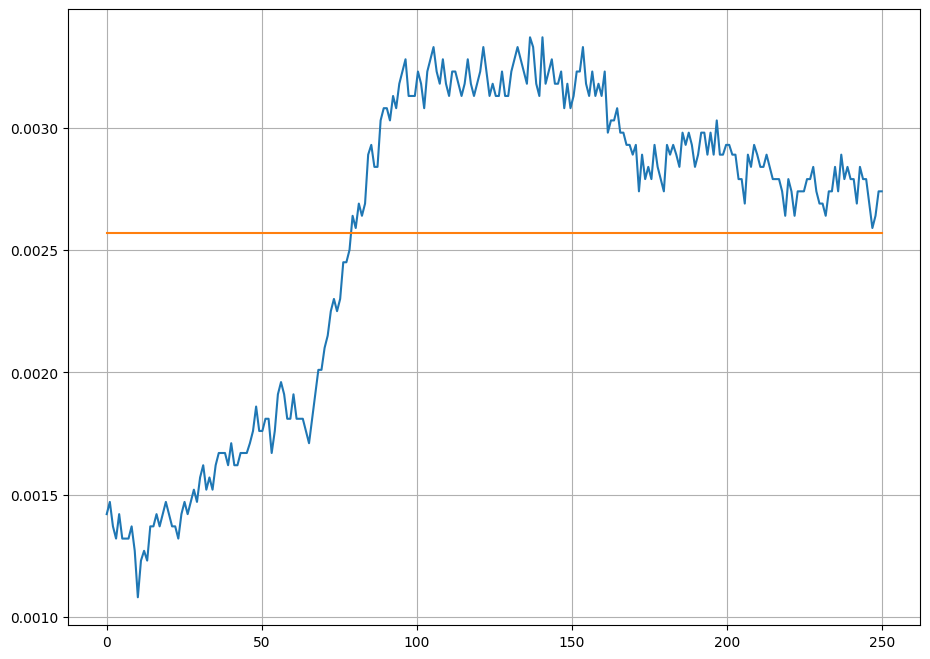

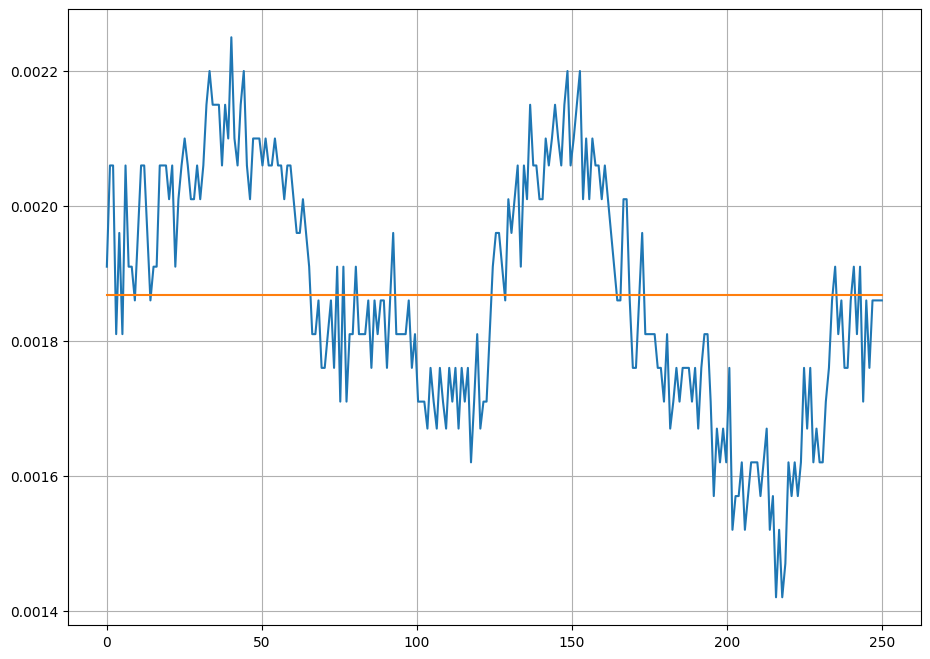

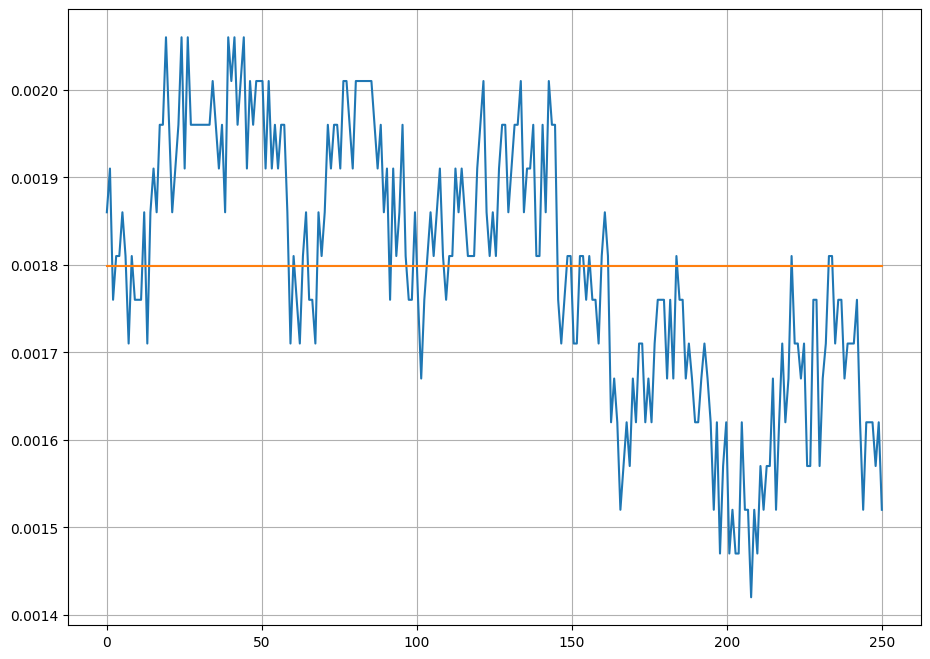

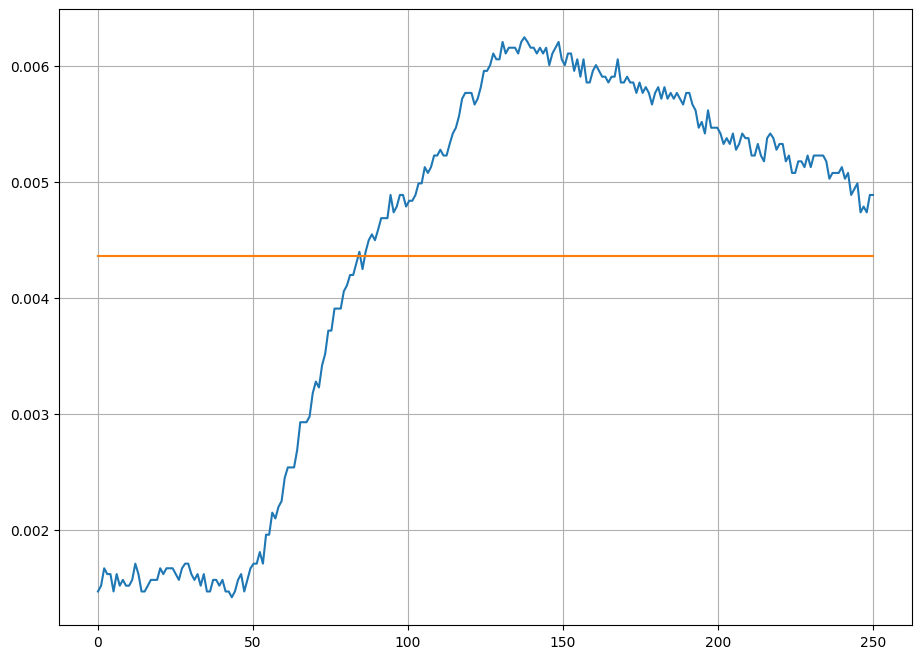

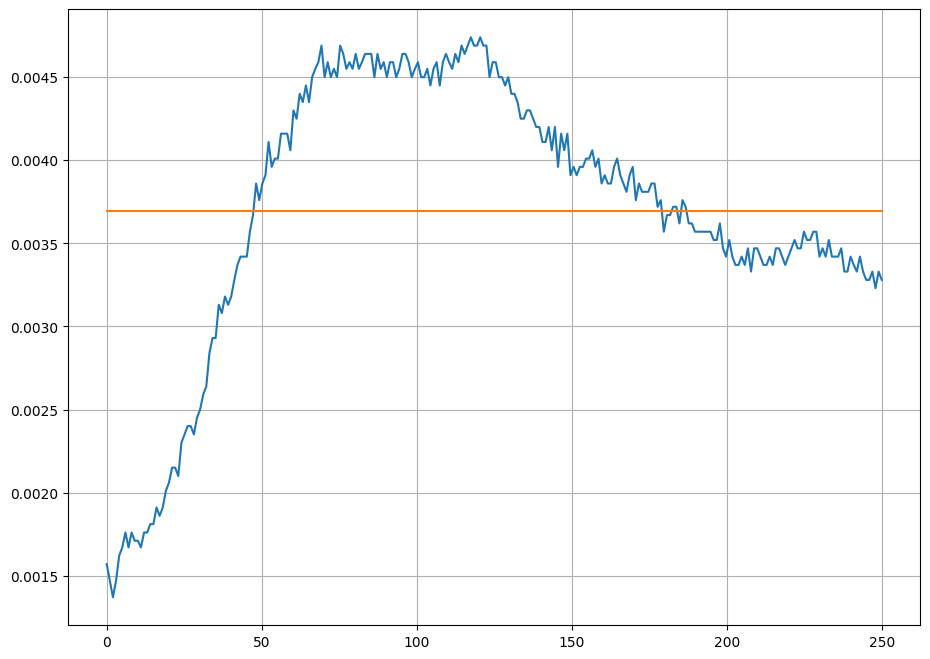

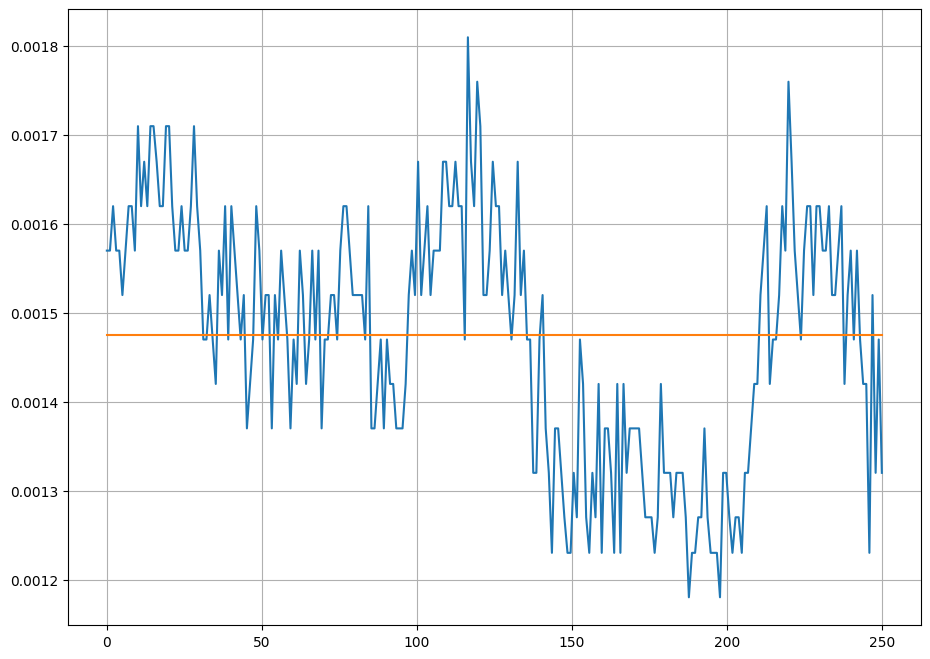

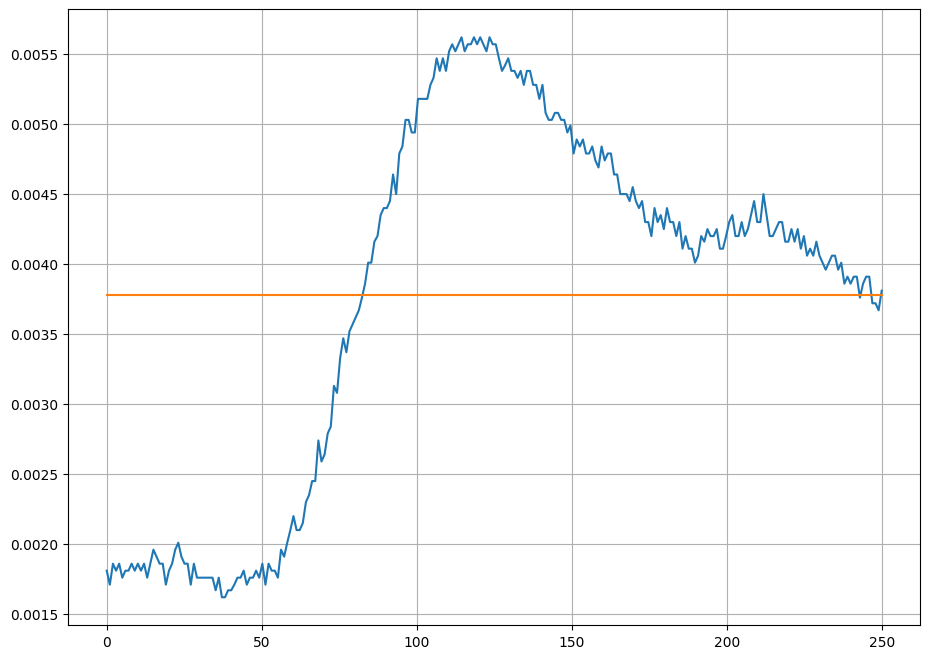

In [190]:
Wf[0]
x=np.linspace(0,len(Wf[0]),len(Wf[0]))
for num in range(10):
    fig, ax =plt.subplots(1, figsize=(11,8))
    ax.grid()
    x=np.linspace(0,len(Wf[num]),len(Wf[num]))
    ax.plot(x,Wf[num])
    ax.plot(x,len(Wf[num])*[np.mean(Wf[num])])
    print(num, 'Baseline is ' , np.mean(Wf[num]) , ' Integral is ', sum(Wf[num]), ' With a max of ', max(Wf[num]))

In [186]:
MaxVoltHam=[]
TimeMaxHam=[]
for num in range(len(Wf)):
    MaxVoltHam.append(max(Wf[num]))
    TimeMaxHam.append(Wf[num].index(max(Wf[num])))

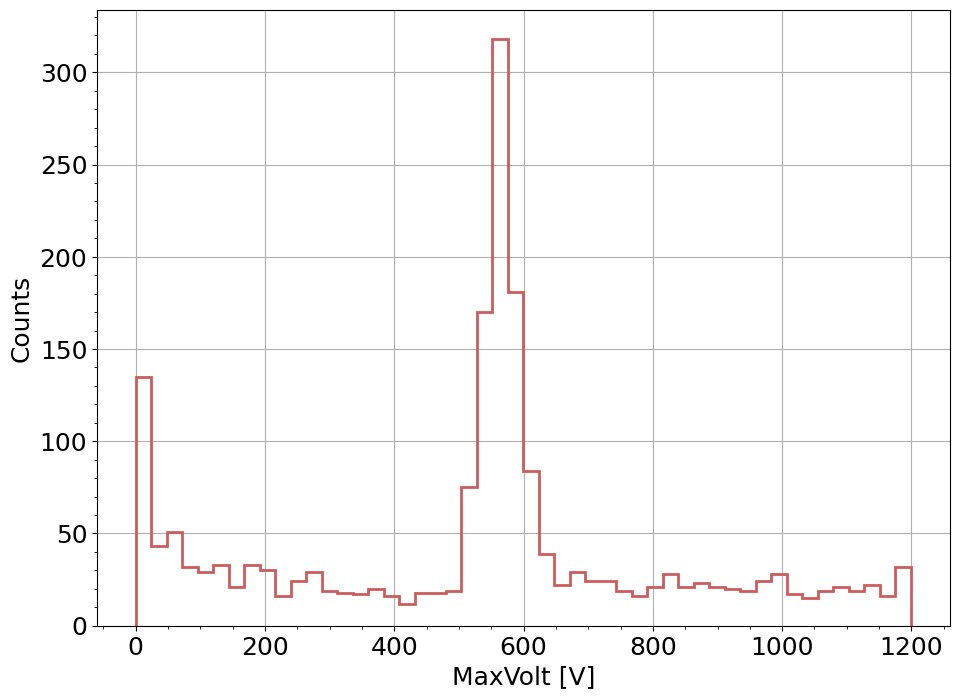

In [188]:

fig,ax=plt.subplots(1,figsize=(11,8))
ax.hist(TimeMaxHam, histtype='step', color='indianred', lw=2, bins=50)
ax.set_xlabel('MaxVolt [V]', fontsize=18)
ax.set_ylabel('Counts', fontsize=18)
ax.grid()
ax.minorticks_on()
ax.tick_params(axis='both', which='major', labelsize=18)


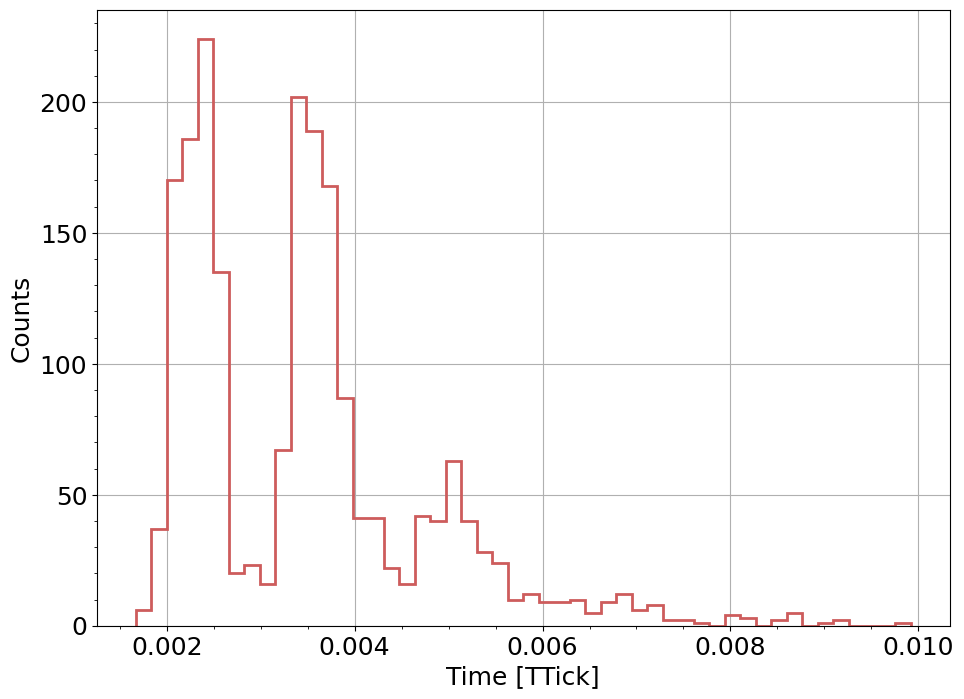

In [191]:

fig,ax=plt.subplots(1,figsize=(11,8))
ax.hist(MaxVoltHam, histtype='step', color='indianred', lw=2, bins=50)
ax.set_xlabel('Time [TTick]', fontsize=18)
ax.set_ylabel('Counts', fontsize=18)
ax.grid()
ax.minorticks_on()
ax.tick_params(axis='both', which='major', labelsize=18)


In [210]:
PEHam=0
for num in range(len(MaxVoltHam)):
    if(0.0028<MaxVoltHam[num]<0.0045):
        PEHam+=1
    elif(0.0045<MaxVoltHam[num]<0.0055):
        PEHam+=2
    elif(0.0055<MaxVoltHam[num]<0.007):
        PEHam+=3
    elif(MaxVoltHam[num]>0.007):
        PEHam+=4
        
print(PEHam) 

1735


In [196]:
Wf=[]
for num in range(2000):
    with open('2000/20002_' +str(num)+'.txt', 'r') as file:
        # Lee todas las líneas del archivo
        lines = file.readlines()
        # Itera sobre cada línea y convierte el contenido a números
        Wf.append([float(line.strip()) for line in lines[450:700]])



In [197]:
MaxVoltCaen=[]
TimeMaxCaen=[]
for num in range(len(Wf)):
    MaxVoltCaen.append(max(Wf[num]))
    TimeMaxCaen.append(Wf[num].index(max(Wf[num])))

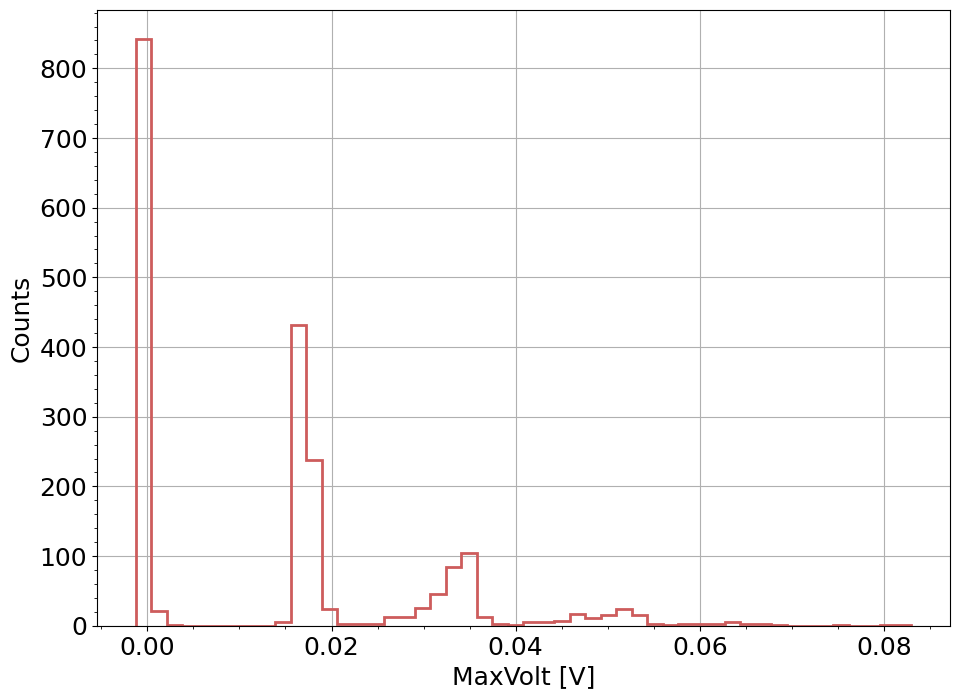

In [198]:
fig,ax=plt.subplots(1,figsize=(11,8))
ax.hist(MaxVoltCaen, histtype='step', color='indianred', lw=2, bins=50)
ax.set_xlabel('MaxVolt [V]', fontsize=18)
ax.set_ylabel('Counts', fontsize=18)
ax.grid()
ax.minorticks_on()
ax.tick_params(axis='both', which='major', labelsize=18)


In [211]:
PECaen=0
for num in range(len(MaxVoltCaen)):
    if(0.015<MaxVoltCaen[num]<0.025):
        PECaen+=1
    elif(0.015<MaxVoltCaen[num]<0.035):
        PECaen+=2
    elif(0.035<MaxVoltCaen[num]<0.06):
        PECaen+=3
print(PECaen)        

1692


In [212]:
print('The ratio is ', PECaen/PEHam)

The ratio is  0.9752161383285303
